# Problem sheet 2 - Moran Model

This is similar to the Wright-Fisher model from problem sheet 1 (expect continuous time). Population of $L$ individuals. 

Let $N_t = \sum_{i =1}^{L} \delta_{X_{t(i),k}}$ be the number of individuals of a single type, $k \in {1,...,L}$ at time $t$. Initially $N_0 =1 $ for all types. 

Recall, $ \frac{d}{dt} \mathbb{E}[f(N_t)] = \mathbb{E}[\mathcal{L}f(N_t)]$ - useful for part c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We used am_done function for the wright fisher model

In [2]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

### Simulation:
- Run a process with rate $L$. 
- Waiting times are distributed exponentially with mean $\beta = 1/L$. 
- When an event occurs pick an individual uniform at random to reproduce and pick an individual uniform at random to be killed.

In [3]:
### Parameter ###

L=50

#################

X=np.zeros((1,L),dtype='int') # initialize (we will use np.append to append to this)
X[0,:]=np.arange(L)

time=0.0
times_list=[] # list of times for sample path

rate=L 
β=1.0/rate # mean wait time, uniformly picking 1/L individual at rate 1

while True: # loop until done 
    wait=np.random.exponential(β) # wait time
    times_list.append((time,time+wait))
    time+=wait
    
    old=X[-1,:] # index -1 is useful. In this case it gives the last row
    new=old.copy() # make a copy
    
    type_to_spread=np.random.choice(old) 

    idx=np.random.choice(np.arange(L))
    new[idx]=type_to_spread # infect    
    new=np.sort(new)  
    
    if(am_done(new)):
        break    
        
    X=np.append(X,[new],axis=0)
    
X=np.append(X,[new],axis=0) # add this for completeness 
times_list.append((time,time+2*wait))

/home/emma/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Text(69.0, 0.5, 'Timestep ')

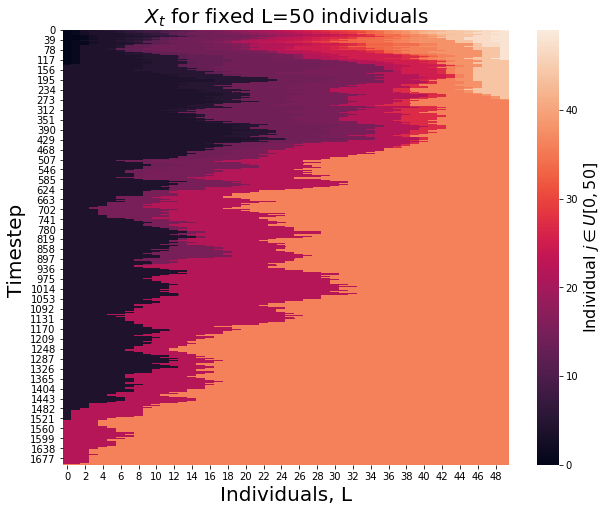

In [4]:
plt.figure(figsize = (10,8))
pcm = sns.heatmap(X,cbar_kws={'label': r'Individual $j \in U[0,{}]$'.format(L)})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.title('$X_t$ for fixed L={} individuals'.format(L), fontsize = 20)
plt.xlabel('Individuals, L', fontsize = 20)
plt.ylabel('Timestep ', fontsize = 20)

In [5]:
start_times=[]
for i in range(len(times_list)):
    start_times.append(times_list[i][0])

In [6]:
def X_to_N(X):
    N=np.zeros_like(X)
    length=np.shape(N)[0]
    L=np.shape(N)[1]
    for row in range(length):
        row_list=list(X[row,:])
        for i in range(L):
            N[row,i]=row_list.count(i)   
    return N

In [7]:
N=X_to_N(X)

Text(0.5, 1.0, '$N_t$ Number of individuals of each species \n out of total population size L = 50')

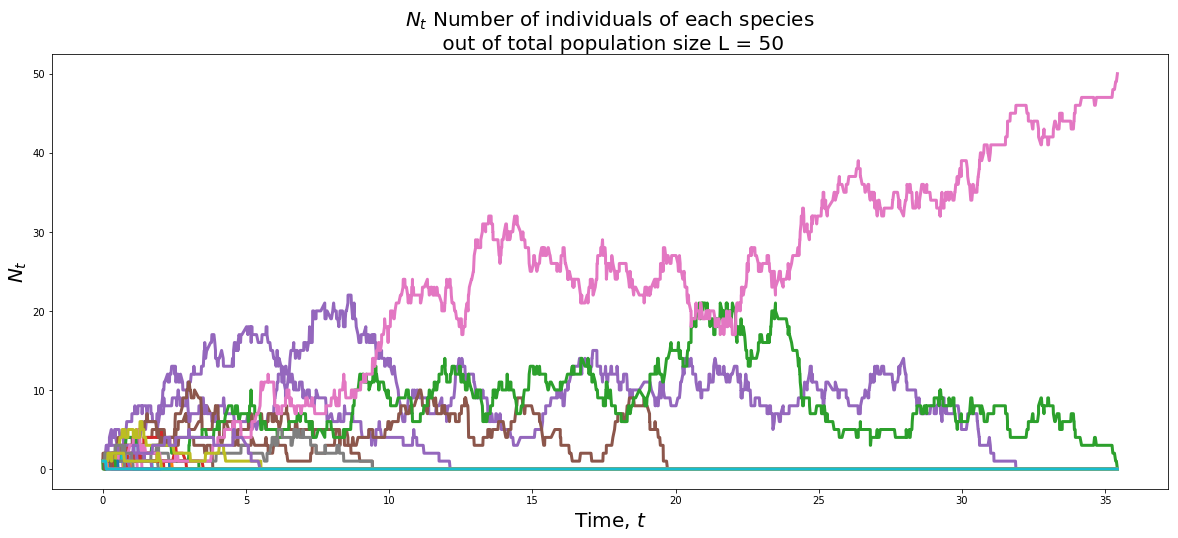

In [8]:
plt.figure(figsize = (20,8))
for i in range(L):
    plt.plot(start_times,N[:,i],lw=3)
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t$', fontsize= 20)

plt.title("$N_t$ Number of individuals of each species \n out of total population size L = {}".format(L), fontsize = 20)

# Networks

You need to install `networkx` on your laptops. Documentation can be found here: [https://networkx.github.io/documentation/stable/index.html](https://networkx.github.io/documentation/stable/index.html)

**INSTALL:**
- Try `pip install networkx`, `sudo pip install networkx` or with `pip3`
- or `pip install --user networkx`

### Introduction to Networkx

In [13]:
import networkx as nx

We can create empty graphs and add nodes/edges.

In [39]:
G = nx.Graph()
G.add_edge('a','b')
G.add_edge('a','c')
G.add_edge('b','c')
G.add_edge('a','d')

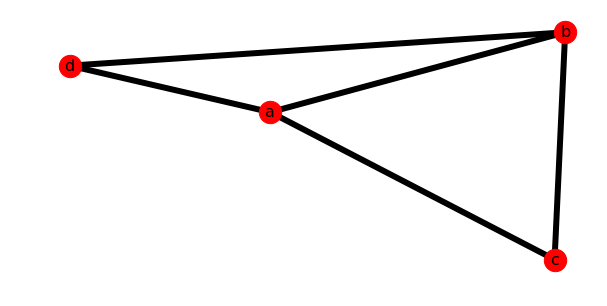

In [33]:
plt.figure(figsize = (10,5))

nx.draw_networkx(G, with_labels = True, node_size=500, font_size=16, width=6) 

plt.axis('off');

We can add weighted edges

In [42]:
G.add_edge('b','d', weight = 0.1)
G.add_edge('a','d', weight = 4)

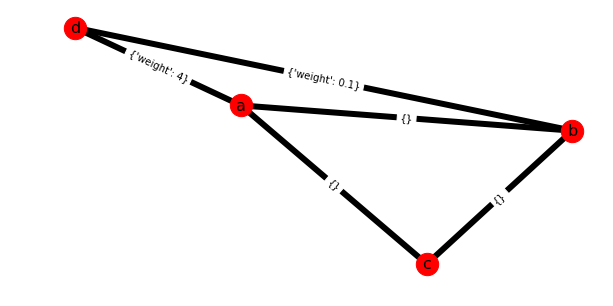

In [35]:
plt.figure(figsize = (10,5))
labels = G.nodes()
pos=nx.spring_layout(G)
nx.draw_networkx(G, with_labels = True, node_size=500,pos = pos, font_size=16, width=6) 

nx.draw_networkx_edge_labels(G,pos);
plt.axis('off');

We can remove edges.

In [40]:
G.remove_edge('a','b')

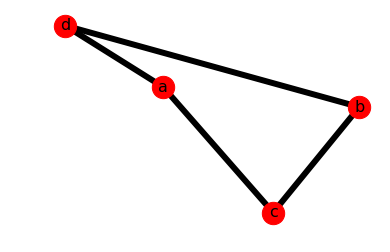

In [43]:
nx.draw_networkx(G, with_labels = True, node_size=500,pos = pos, font_size=16, width=6) 
plt.axis('off');

### Indexing:

In [50]:
G.nodes #Python dictionary

NodeView(('d', 'b', 'a', 'c'))

In [51]:
for node in G.nodes():
      print('Node', node)

Node d
Node b
Node a
Node c


It can be usefull to change the labels of all nodes to numeric values, starting in zero.

In [53]:
G = nx.convert_node_labels_to_integers(G, first_label=0)
for node in G.nodes():
      print('Node', node)

Node 0
Node 1
Node 2
Node 3


In [54]:
for weight in G.edges(data=True):
      print(weight)

(0, 1, {'weight': 0.1})
(0, 2, {'weight': 4})
(1, 3, {})
(2, 3, {})


We can add weights to all edges:

In [55]:
for edge in G.edges():
      G[edge[0]][edge[1]]['weight'] = 1.5
# Printing...
for n1 in G.edges(data=True):
      print(n1)

(0, 1, {'weight': 1.5})
(0, 2, {'weight': 1.5})
(1, 3, {'weight': 1.5})
(2, 3, {'weight': 1.5})


## Graph operators

In [56]:
G.clear()
print(G.nodes())
print(G.edges)

[]
[]


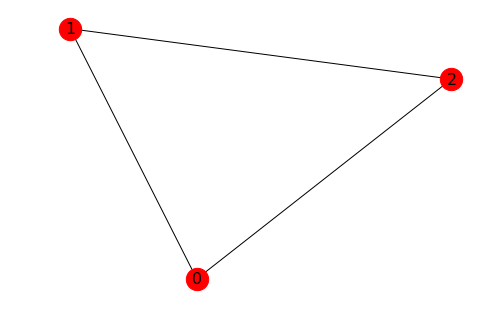

In [58]:
G = nx.Graph([(0,1),(1,2),(2,0)])
nx.draw(G, with_labels = True, node_size=500, font_size=16)
plt.show(True)

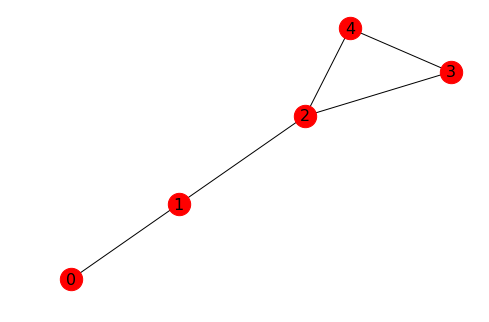

In [59]:
G1 = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4)])
nx.draw(G1, with_labels = True, node_size=500, font_size=16)
plt.show(True)

G2 is the disjoint union of G and G1.

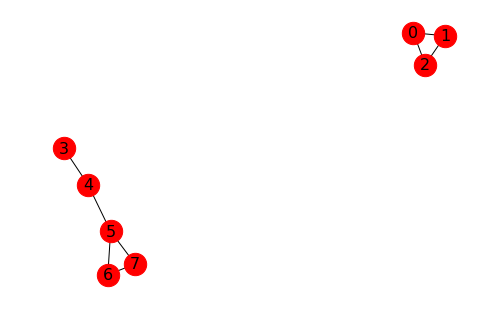

In [61]:
G2 = nx.disjoint_union(G,G1)
nx.draw(G2, with_labels = True, node_size=500, font_size=16)
plt.show(True)

Notice that the labels are changed and now the graph has 7 nodes.

In [62]:
print('Nodes:', G2.nodes())
print('Edges:', G2.edges())

Nodes: [0, 1, 2, 3, 4, 5, 6, 7]
Edges: [(0, 1), (0, 2), (1, 2), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7)]


Another option is to compose the graphs. In this case, nodes with the same label in different graphs are considered as the same.

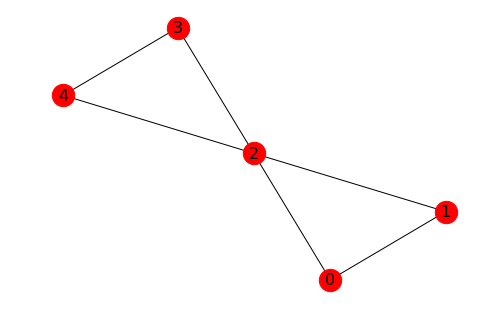

In [64]:
G3 = nx.compose(G,G1)
nx.draw(G3, with_labels = True, node_size=500, font_size=16)
plt.show(True)

We can create directed graphs:

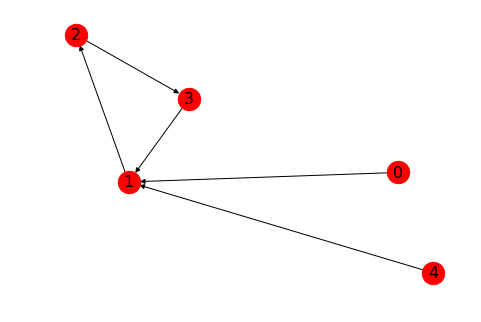

In [65]:
G.clear()
edgelist=[(0,1),(1,2),(2,3), (3,1), (4,1)]
G = nx.DiGraph(edgelist)
pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.show(True)

### Largest Component

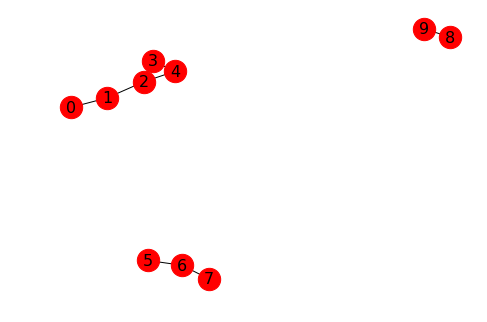

In [68]:
G.clear()
G = nx.Graph([(0,1),(1,2),(2,3), (3,4), (2,4), (5,6), (6,7), (8,9)])
nx.draw(G, with_labels = True, node_size=500, font_size=16)
plt.show(True)

In [70]:
# get the components
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print(Gcc[0].nodes())
print(Gcc[1].nodes())
print(Gcc[2].nodes())

[0, 1, 2, 3, 4]
[5, 6, 7]
[8, 9]


[0, 1, 2, 3, 4]


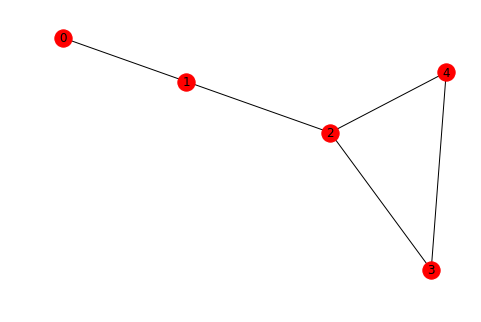

In [72]:
#get the largest component
G=Gcc[0]
print(G.nodes())
nx.draw(G, with_labels = True)
plt.show()

## Network Structure: Degree, clustering and distance

In [73]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 5
Number of edges: 5


In [77]:
vk = dict(G.degree())
vk = list(vk.values())
vk = np.array(vk)
print('Degree = ', vk)

Degree =  [1 2 3 2 2]


In [76]:
md = np.mean(vk)
print('Mean degree: ', md)

Mean degree:  2.0


In [80]:
# degree distribution
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [81]:
ks, Pk = degree_distribution(G)

### Transitivity and clustering
In addition to the degree, another important property of networks is related to the number of triangles, which is related to the concept of transitivity. The transitivity of the network G is calculated as:

In [85]:
CC = (nx.transitivity(G)) 
print("Transitivity = ",CC)

Transitivity =  0.5


The level of triangles in a network can also be quantified by the average clustering coefficient, calculated from the local clustering coefficient, i.e.,

In [86]:
avc = nx.average_clustering(G)
print("Average clustering:", avc)

Average clustering: 0.4666666666666666


### Distance

The distance between pairs of  nodes is given by the number of edges between them, where edges and nodes are not repeated. The distance with the minimal length is called the shortest path. The average shortest path length can be calculated by:

In [87]:
if nx.is_connected(G) == True:
    l = nx.average_shortest_path_length(G)
    print("Average shortest path length:", l)
else:
    print("The graph has more than one connected component")

Average shortest path length: 1.7


The matrix of distances stores the distances between all pairs of nodes. From this matrix, we can calculate the distribution of the shortest paths between all pairs of nodes. Notice that $D$ is symmetric, because are considering undirected networks.